In [16]:
import networkx as nx
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open("WG.pickle", 'rb') as f:
    G = pickle.load(f)

In [22]:
Gcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

In [23]:
degrees = [val for (node, val) in G.degree()]

In [24]:
np.mean(degrees)

7.321477428180574

In [25]:
np.min(degrees)

1

In [26]:
np.max(degrees)

428

(array([105., 232., 197., 105.,  51.,  22.,  12.,   6.,   0.,   1.]),
 array([0.        , 0.60591232, 1.21182464, 1.81773696, 2.42364928,
        3.0295616 , 3.63547392, 4.24138624, 4.84729856, 5.45321088,
        6.0591232 ]),
 <BarContainer object of 10 artists>)

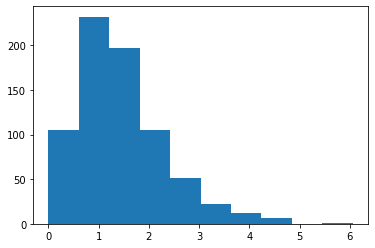

In [28]:
plt.hist(np.log(degrees))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=061c6de9-714b-4aa5-8dca-7fde3082e296' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>